In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.6.0


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
79/79 [==============================] - 1s 4ms/step - loss: 0.7664 - accuracy: 0.4944 - val_loss: 0.7034 - val_accuracy: 0.5140
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5244 - val_loss: 0.6974 - val_accuracy: 0.5120
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5324 - val_loss: 0.6994 - val_accuracy: 0.5088
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5420 - val_loss: 0.6989 - val_accuracy: 0.5016
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5448 - val_loss: 0.6979 - val_accuracy: 0.5032
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5292 - val_loss: 0.6987 - val_accuracy: 0.5064
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.5432 - val_loss: 0.6991 - val_accuracy: 0.5004
Epoch 8/100
7

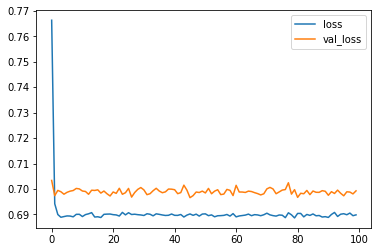

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

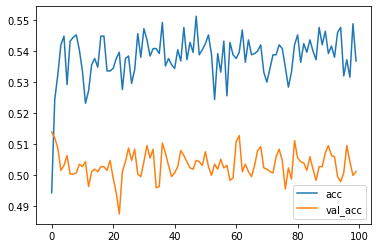

In [6]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [7]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6863 - accuracy: 0.5448 - val_loss: 0.6587 - val_accuracy: 0.6428
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6310 - accuracy: 0.6844 - val_loss: 0.5844 - val_accuracy: 0.7712
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5462 - accuracy: 0.7760 - val_loss: 0.5010 - val_accuracy: 0.8080
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4570 - accuracy: 0.8268 - val_loss: 0.4238 - val_accuracy: 0.8496
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3929 - accuracy: 0.8508 - val_loss: 0.3687 - val_accuracy: 0.8604
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.8672 - val_loss: 0.3337 - val_accuracy: 0.8688
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3199 - accuracy: 0.8688 - val_loss: 0.3096 - val_accuracy: 0.8812
Epoch 8/200
7

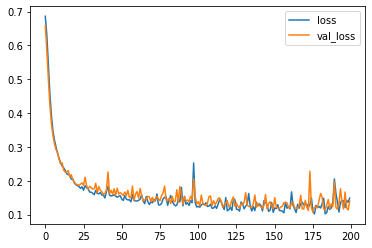

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

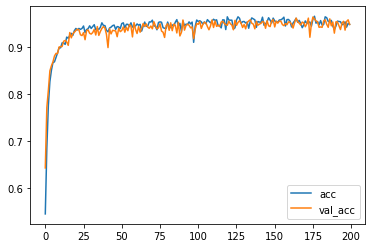

In [10]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [11]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [12]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
79/79 [==============================] - 1s 8ms/step - loss: 0.7015 - accuracy: 0.5096 - val_loss: 0.6975 - val_accuracy: 0.5036
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5372 - val_loss: 0.6706 - val_accuracy: 0.5876
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.6200 - val_loss: 0.6236 - val_accuracy: 0.6524
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6214 - accuracy: 0.6664 - val_loss: 0.6035 - val_accuracy: 0.6660
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6080 - accuracy: 0.6664 - val_loss: 0.5721 - val_accuracy: 0.7244
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.7016 - val_loss: 0.5558 - val_accuracy: 0.7204
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5709 - accuracy: 0.7056 - val_loss: 0.5697 - val_accuracy: 0.7008
Epoch 8/200
7

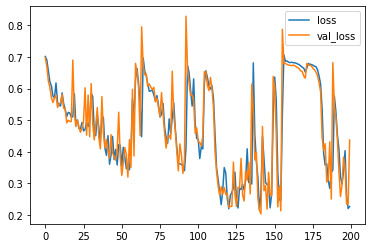

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

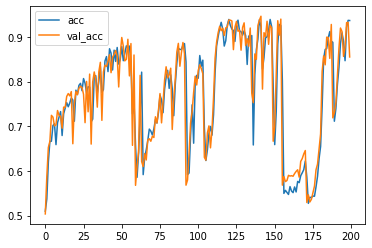

In [14]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
79/79 [==============================] - 3s 13ms/step - loss: 0.6949 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5080
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6939 - accuracy: 0.5024 - val_loss: 0.6936 - val_accuracy: 0.4912
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 4/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5048 - val_loss: 0.6928 - val_accuracy: 0.5140
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.4976 - val_loss: 0.6928 - val_accuracy: 0.5172
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5108 - val_loss: 0.6931 - val_accuracy: 0.4980
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6920 - accuracy: 0.5072 - val_loss: 0.6919 - val_accuracy: 0.5064
Epoch 8/200


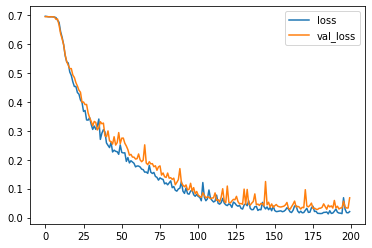

In [16]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

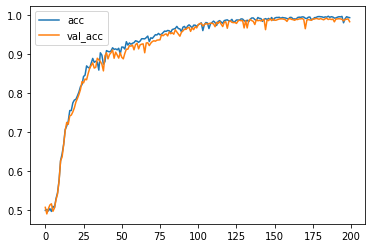

In [17]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [18]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [19]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
79/79 [==============================] - 2s 12ms/step - loss: 0.7078 - accuracy: 0.5116 - val_loss: 0.6988 - val_accuracy: 0.4884
Epoch 2/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6928 - accuracy: 0.5204 - val_loss: 0.6940 - val_accuracy: 0.5196
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6956 - accuracy: 0.5340 - val_loss: 0.6972 - val_accuracy: 0.5092
Epoch 4/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6945 - accuracy: 0.5192 - val_loss: 0.6987 - val_accuracy: 0.4992
Epoch 5/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6927 - accuracy: 0.5324 - val_loss: 0.6978 - val_accuracy: 0.4908
Epoch 6/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6903 - accuracy: 0.5448 - val_loss: 0.6897 - val_accuracy: 0.5424
Epoch 7/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6937 - accuracy: 0.5276 - val_loss: 0.6948 - val_accuracy: 0.5188
Epoch 8/200


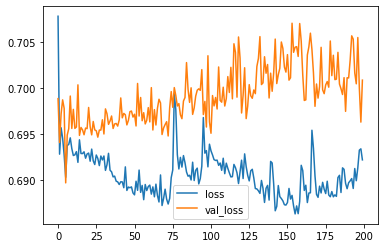

In [20]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

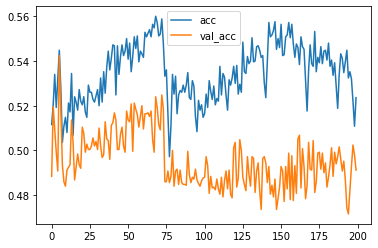

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [22]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
79/79 [==============================] - 3s 17ms/step - loss: 0.6944 - accuracy: 0.5004 - val_loss: 0.6948 - val_accuracy: 0.4912
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6939 - accuracy: 0.5072 - val_loss: 0.6953 - val_accuracy: 0.4884
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6925 - accuracy: 0.5056 - val_loss: 0.6954 - val_accuracy: 0.4988
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6923 - accuracy: 0.5144 - val_loss: 0.6950 - val_accuracy: 0.4940
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6920 - accuracy: 0.5224 - val_loss: 0.6963 - val_accuracy: 0.4920
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6920 - accuracy: 0.5164 - val_loss: 0.6961 - val_accuracy: 0.4880
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6914 - accuracy: 0.5236 - val_loss: 0.6972 - val_accuracy: 0.4872
Epoch 

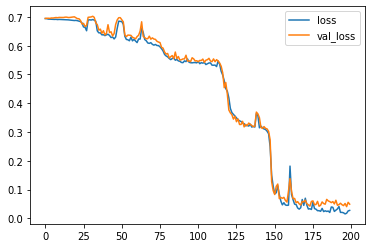

In [23]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

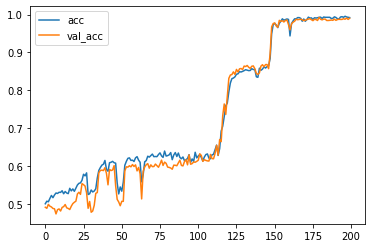

In [24]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
79/79 [==============================] - 3s 17ms/step - loss: 0.6930 - accuracy: 0.5220 - val_loss: 0.6966 - val_accuracy: 0.4872
Epoch 2/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.5188 - val_loss: 0.6942 - val_accuracy: 0.4820
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.5040 - val_loss: 0.6974 - val_accuracy: 0.5020
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6926 - accuracy: 0.5120 - val_loss: 0.6993 - val_accuracy: 0.5020
Epoch 5/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5156 - val_loss: 0.6959 - val_accuracy: 0.4872
Epoch 6/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6925 - accuracy: 0.5120 - val_loss: 0.6952 - val_accuracy: 0.4752
Epoch 7/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6928 - accuracy: 0.5180 - val_loss: 0.6970 - val_accuracy: 0.5008
Epoch 

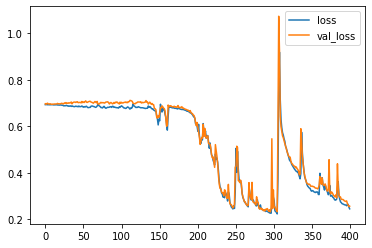

In [26]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

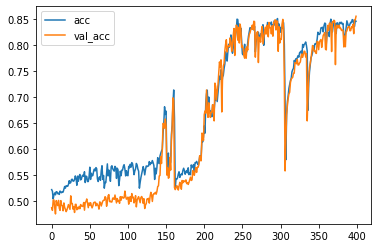

In [27]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [28]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [29]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
79/79 [==============================] - 4s 21ms/step - loss: 0.6942 - accuracy: 0.4908 - val_loss: 0.6932 - val_accuracy: 0.5140
Epoch 2/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6937 - accuracy: 0.4912 - val_loss: 0.6937 - val_accuracy: 0.4796
Epoch 3/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6939 - accuracy: 0.4960 - val_loss: 0.6933 - val_accuracy: 0.4988
Epoch 4/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6935 - accuracy: 0.5020 - val_loss: 0.6939 - val_accuracy: 0.4872
Epoch 5/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6936 - accuracy: 0.4952 - val_loss: 0.6934 - val_accuracy: 0.4736
Epoch 6/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6934 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.5064
Epoch 7/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6937 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5112
Epoch 

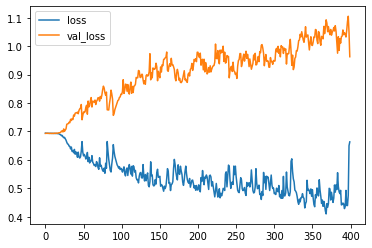

In [30]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

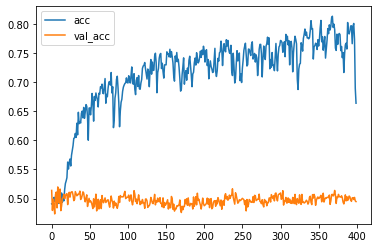

In [31]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [32]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
79/79 [==============================] - 3s 21ms/step - loss: 0.6945 - accuracy: 0.5048 - val_loss: 0.6924 - val_accuracy: 0.5296
Epoch 2/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6928 - accuracy: 0.5088 - val_loss: 0.6943 - val_accuracy: 0.4916
Epoch 3/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6913 - accuracy: 0.5256 - val_loss: 0.6934 - val_accuracy: 0.5068
Epoch 4/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6921 - accuracy: 0.5232 - val_loss: 0.6892 - val_accuracy: 0.5392
Epoch 5/100
79/79 [==============================] - 1s 16ms/step - loss: 0.6851 - accuracy: 0.5572 - val_loss: 0.6804 - val_accuracy: 0.5592
Epoch 6/100
79/79 [==============================] - 1s 17ms/step - loss: 0.6762 - accuracy: 0.5628 - val_loss: 0.6750 - val_accuracy: 0.5504
Epoch 7/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6644 - accuracy: 0.5908 - val_loss: 0.6573 - val_accuracy: 0.6096
Epoch 

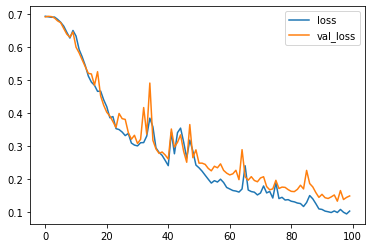

In [33]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

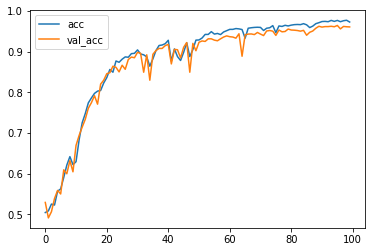

In [34]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()